<a href="https://colab.research.google.com/github/dreamboothfr/dreamboothfr/blob/main/DreamBoothFR_Stable_Diffusion_By_Dreambooth_FR_LOAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

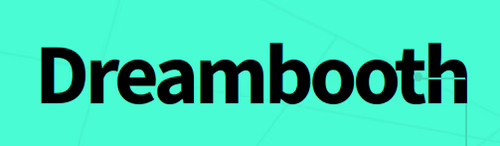

Cet outil vous est proposé par Dreambooth.fr https://www.dreambooth.fr

*Pour valider les parties/formulaires qui vont suivre, utilisez le bouton play/exécuter, présentant une flèche blanche dans un rond noir.*

# Charger le modèle que vous avez reçu via votre Google Drive

Pour charger le modèle que vous avez reçu réalisez les étapes :

- [1] Installation des outils necessaires à l'utilisation de Dreambooth
- [2] Se connecter à Google Drive (Indiquez le pseudo du modèle qui vous a été indiqué)
- [3] Chargement du modèle
- [4] Génération de vos images via Dreambooth

Ce document est confidentiel et est reservé pour votre propre utilisation suite à votre commande de modèle sur Dreambooth.fr, si vous avez un soucis ou une erreur inexpliquée, contactez-vous sur contact@dreambooth.fr

**En tant que client, nous vous offrons un code promotionnel à communiquer à vos ami(e)s souhaitant acquérir un modèle d'intelligence artificielle Dreambooth.**

Voici le code de réduction offrant 5€ : **GOOGLECOLAB**

Ce code est à préciser au moment de l'étape de paiement sur la droite.

In [ ]:
#@title [1] Installation des outils nécessaires à l'utilisation de Dreambooth

#@markdown <<<< Pour exécuter cette partie, utilisez ce bouton play, utilisez le même principe sur les parties ci-dessous.

#@markdown Le temps de traitement peut être long, veuillez patienter jusqu'à la fin.
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/examples/dreambooth/train_dreambooth.py
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
%pip install -q -U --pre triton
%pip install -q accelerate==0.12.0 transformers ftfy bitsandbytes gradio natsort
%pip install -q https://github.com/brian6091/xformers-wheels/releases/download/0.0.15.dev0%2B4c06c79/xformers-0.0.15.dev0+4c06c79.d20221205-cp38-cp38-linux_x86_64.whl

In [ ]:
#@title [2] Se connecter à Google Drive

#@markdown Il est nécessaire de se connecter à Google Drive pour utiliser le modèle que vous reçu.

#@markdown Vous devez au préalable décompresser le fichier qui vous a été envoyé "**DRXXXXFR.zip**"

#@markdown A la racine de votre Drive, créez un dossier **stable_diffusion_weights**, dans ce dossier, vous déposez le dossier contenu dans le zip que vous avez reçu. Le dossier par exemple **DRXXXXFR** doit être déposé dans **stable_diffusion_weights**.

#@markdown Indiquez le nom du dossier "**DRXXXXFR**" dans le champ "PSEUDO" ci-dessous.

#@markdown Cliquez sur le bouton Play/Executer à gauche, si une erreur survient, vérifiez le chemin des dossiers.
from google.colab import drive
drive.mount('/content/drive')
MODEL_NAME = "runwayml/stable-diffusion-v1-5"

PSEUDO = "" #@param {type:"string"}
OUTPUT_DIR = "/content/drive/MyDrive/stable_diffusion_weights/" + PSEUDO

print(f"[*] Les fichiers seront sauvegardés dans votre drive : {OUTPUT_DIR}")

!mkdir -p $OUTPUT_DIR

concepts_list = [
    {
        "instance_prompt":      "photo of " + PSEUDO,
        "class_prompt":         "photo of a person",
        "instance_data_dir":    "/content/data/" + PSEUDO,
        "class_data_dir":       "/content/data/person"
    },
]

import json
import os
for c in concepts_list:
    os.makedirs(c["instance_data_dir"], exist_ok=True)

with open("concepts_list.json", "w") as f:
    json.dump(concepts_list, f, indent=4)

In [ ]:
#@title [3] Chargement du modèle

#@markdown **<<<< Chargez le modèle**

MAX_TRAIN = 800
WEIGHTS_DIR = OUTPUT_DIR + "/" + str(MAX_TRAIN)

import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

model_path = WEIGHTS_DIR

scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
pipe = StableDiffusionPipeline.from_pretrained(model_path, scheduler=scheduler, safety_checker=None, torch_dtype=torch.float16).to("cuda")

g_cuda = None

In [ ]:
#@title [4] Génération de vos images via Dreambooth

#@markdown Indiquez une description de la photo que vous désirez, **cette description doit toujours comporter "photo of DRXXXXFR" => ce que vous avez reçu.**.

#@markdown Pour vous aider à décrire votre photo, vous pouvez vous aider de https://promptomania.com/stable-diffusion-prompt-builder/

#@markdown Les paramétres indiqués sont ceux conseillés pour que la génération de vos images se termine sans erreur, si vous souhaitez obtenir une image plus grande, diminuez le nombre d'images à générer ou le nombre d'étape.

#@markdown Si vous rencontrez des erreurs "out of memory" ou "memory of cuda", cliquez en haut sur "Exécution" => "Gérer les sessions", cliquez sur "Arreter" sur votre session, et recommencez les différentes étapes.

#@markdown **Cet outil proposé par Google est gratuit mais est limité dans son utilisation**, si vous recevez un message vous indiquant que vous n'avez plus de GPU, vous avez atteint la limite. Vous pouvez en général recommencer le lendemain, vous pouvez aussi passer à Google Colab Pro (10€/mois). La génération sera plus rapide.

#@markdown Découvrez des exemples de description dans la dernière partie

#@markdown

description = "photo of DRXXXX << Remplacer cette valeur par celle reçue." #@param {type:"string"}
description_negative = "" #@param {type:"string"}
nombre_images = 4 #@param {type:"number"}
echelle_de_guidage = 7.5 #@param {type:"number"}
nombre_etape = 50 #@param {type:"number"}
largeur = 512 #@param {type:"number"}
hauteur = 512 #@param {type:"number"}

with autocast("cuda"), torch.inference_mode():
    images = pipe(
        description,
        height=hauteur,
        width=largeur,
        negative_prompt=description_negative,
        num_images_per_prompt=nombre_images,
        num_inference_steps=nombre_etape,
        guidance_scale=echelle_de_guidage,
        generator=g_cuda
    ).images

for img in images:
    display(img)

#Exemple de description

Les descriptions sont toujours à saisir en anglais.

Une description doit comprendre le mot clé "**photo of DRXXXXFR**", remplacez XXXX par votre numéro.

Ces descriptions sont à titres indicatives, votre imagination peut faire le reste, cela va vous permettre de comprendre comment celà fonctionne.

Dans les descriptions, vous pouvez remplacer girl / women par boy / men selon votre besoin.

# Description Négative

Si vous constatez des malformations, des erreurs sur les photos, vous pouvez insérer ceci dans **description_negative** :

Deformed, blurry, bad anatomy, disfigured, poorly drawn face, mutation, mutated, extra limb, ugly, poorly drawn hands, missing limb, blurry, floating limbs, disconnected limbs, malformed hands, blur, out of focus, long neck, long body, ((((mutated hands and fingers)))), (((out of frame))), cgi, Two bodies, Two heads,extra nipples,  extra fingers, disfigured, tiling, cloned face, extra limbs, extra fingers, mutated hands, bad anatomy, bad proportions , blind, bad eyes, ugly eyes, dead eyes, out of shot, out of focus,writing, watermark, logo, oversaturation , over saturation, over shadow

# Description Super Girl

full body character with face concept art of **DRXXXXFR** as a super heroin, a beautiful female supergirl!! french colors, french flag, red blue white, paris, eiffel tower, intricate, red, blue gold suit, powers, speed, dc comics, cinematic, stunning, highly detailed, digital painting, artstation, smooth, hard focus, illustration, art by artgerm and greg rutkowski and alphonse mucha

# Description Comics

comics full body character of **DRXXXXFR** a supergirl with thunder powers | | very very comics!!!, fine - face, french flag, color blue red white, paris, effeil tower, realistic shaded perfect face, fine details. comics. realistic shaded lighting poster by ilya kuvshinov katsuhiro otomo ghost - in - the - shell, magali villeneuve, artgerm, illustrated by kohei horikoshi, official media, jeremy lipkin and michael garmash and rob rey 

# Description Fornite

**DRXXXXFR** as basket player on Fornite plays Fortnite battle royale ,very detailed, full body shot 8K quality super realistic, tentacles, unnatural shapes, jellyfish, insect, octane render, 3d digital art by beeple, unreal engine 5, award winning

a detailed portrait of **DRXXXXFR** in fortnite as basket player, fortnite!!! skin player, unreal engine 5 rendered, incredibly highly detailed and realistic, 8 k, sharp focus, studio quality 

# Description Naruto

portrait of **DRXXXXFR** as naruto uzumaki, face (naruto uzumaki), rpg reference, oil painting, trending on artstation, octane render, insanely detailed, 8 k, hd 

full body portrait character of **DRXXXXFR**!!!! as naruto uzumaki, rpg reference, oil painting, trending on artstation, octane render, insanely detailed, 8 k, hd 

A portrait of **DRXXXXFR** as Pain-Akatsuki-personagens-naruto!!!!, RPG Reference,  art by ilya kuvshinov, artgerm, Alphonse mucha, and Greg Rutkowski, Trending on Artstation, octane render, Insanely Detailed, 8k, HD

# Description Mineur

a portrait of **DRXXXXFR** as an old coal miner in 19th century, beautiful painting with highly detailed face by greg rutkowski and magali villanueve

# Description Animé

anime portrait of **DRXXXXFR** as an anime man by Stanley Artgerm Lau, WLOP, Rossdraws, James Jean, Andrei Riabovitchev, Marc Simonetti, and Sakimichan, trending on artstation

anime portrait of **DRXXXXFR** as a slick hair man with red eyes, studio ghibli, pixar and disney animation, sharp, rendered in unreal engine 5, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, wide angle, artbook, wallpaper, splash art, promo art, dramatic lighting, art by artgerm and greg rutkowski and bo chen and jin xiaodi 

full body portrait of **DRXXXXFR** character concept art, anime key visual of a confused oldman, studio lighting delicate features finely detailed perfect face directed gaze, gapmoe yandere grimdark, trending on pixiv fanbox, painted by greg rutkowski makoto shinkai takashi takeuchi studio ghibli 

**DRXXXXFR** with thunder powers | | very very anime!!!, fine - face, realistic shaded perfect face, fine details. anime. realistic shaded lighting poster by ilya kuvshinov katsuhiro otomo ghost - in - the - shell, magali villeneuve, artgerm, illustrated by kohei horikoshi, official media, jeremy lipkin and michael garmash and rob rey 

a very detailed manga of **DRXXXXFR** in demon slayer manga panel, action lines, greg rutkowski, high resolution, dynamic pose, landscape, medium portrait, samurai outfit, action, hyper realistic, manga, koyoharu gotouge, sakuga 

# Description Iron Man

elegant romantic portrait photo of **DRXXXXFR** as iron man by greg manchess, mucha, william adolphe bouguereau, john singer sargent, sorolla, winslow homer, dean cornwell, james gurney, kilin eng, ilya repin, 

# Description Funko Pop

photorealistic photo of a **DRXXXXFR** funko pop with box, detailed studio lighting, award - winning crisp details, digital art, unreal engine, trending on artstation

# Description Cyber Punk

wideangle!! portrait shot of **DRXXXXFR** in cyberpunk 2 0 7 7, intricate, elegant, highly detailed, centered, digital painting, artstation, concept art, smooth, sharp focus, illustration, artgerm, tomasz alen kopera, peter mohrbacher, donato giancola, joseph christian leyendecker, wlop, boris vallejo 

a painting of **DRXXXXFR** wearing a suit and tie, a cyberpunk character portrait by Vladimir Tretchikoff, trending on Artstation, cloisonnism, late 1960s, digital painting, digital illustration, vaporwave

beautiful portrait of **DRXXXXFR** as a cyber punk female by marco mazzini and hanna yata, digital art, concept art, 3 - d 4 k, fantasy, devian art, trending on art station

portrait of **DRXXXXFR** as a pretty girl looking up, wearing a black choker, red hands touching her hair and body, cyber punk, intricate, bright colors, sharp focus, illustration, highly detailed, concept art, matte, trending on artstation, anime, art by wlop and artgerm and greg rutkowski, ilya kuvshinov, strong strokes, h 6 4 0

portrait futuristic lovely of **DRXXXXFR** as cyberpunk female police, in heavy rainning futuristic tokyo rooftop cyberpunk night, ssci-fi, fantasy, intricate, very very beautiful, elegant, neon light, highly detailed, digital painting, artstation, concept art, soft light, hdri, smooth, sharp focus, illustration, art by tian zi and craig mullins and WLOP and alphonse mucha

detailed portrait of **DRXXXXFR** Neon Business Girl, cyberpunk futuristic neon, reflective puffy coat, decorated with traditional Japanese ornaments by Ismail inceoglu dragan bibin hans thoma greg rutkowski Alexandros Pyromallis Nekro Rene Maritte Illustrated, Perfect face, fine details, realistic shaded, fine-face, pretty face

photo of **DRXXXXFR** as a whirlwind inside the metaverse, male, science, hologram, half body, neurochip, android, cyborg, cyberpunk face, by loish, d & d, fantasy, intricate, elegant, highly detailed, colorful, digital painting, artstation, concept art, art by artgerm and greg rutkowski and alphonse mucha 

photo of **DRXXXXFR** wearing futuristic leather jacket and futuristic goggles, a neon broadsword, cyberpunk 2 0 7 7, medium shot, background is filled with neon lights and futuristic vehicles, trending on artstation, ultra realistic, 4 k 

futuristic cyberpunk photo of **DRXXXXFR** symmetrical artwork by Tooth Wu and wlop and beeple. octane render, trending on artstation, greg rutkowski very coherent symmetrical artwork. cinematic, hyper realism, high detail, octane render, 8k

# Description SciFi

symmetry!! portrait of **DRXXXXFR* as Joker, sci - fi, tech wear, glowing lights!! intricate, elegant, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha 

# Description Detective

portrait of **DRXXXXFR** as detective by Bethesda, Fallout, vaporwave, face, realistic, synth, extremely detailed, symmetrical face, large eyes, deviantart, Blade Runner, hyper realistic, digital art, octane render, trending on artstation, artstationHD, artstationHQ, unreal engine, 4k, 8k

# Description Portrait réalise

portrait of **DRXXXXFR** by Bethesda, vaporwave, face, realistic, synth, extremely detailed, symmetrical face, large eyes, deviantart, Blade Runner, hyper realistic, digital art, octane render, trending on artstation, artstationHD, artstationHQ, unreal engine, 4k, 8k

# Description 3D

hyperdetailed 3 d cartoon render of **DRXXXXFR** in a confident expressive pose, 3 d background, cinematic studio lighting, studio quality, octane render, unreal engine 5, trending on artstation, 8 k 

# Description Marvel Xmen

photo of **DRXXXXFR** as Marvel's Cyclops, X-Men, ultra realistic, concept art, intricate details, eerie, highly detailed, photorealistic, octane render, 8k, unreal engine. art by Artgerm and Greg Rutkowski

# Description Agent Secret

a highly detailed matte full body portrait character of **DRXXXXFR** as a secret agent, epic fantasy, god rays, ultrawide lens, aerial photography, unreal engine, exquisite detail, 8 k, art by greg rutkowski and alphonse mucha 

a highly detailed matte full body portrait character of **DRXXXXFR** as hitman in a black suit and black fedora hat. he has a big silver gun, 4 k, atmospheric, epic scene, strong shadows, high contrast 

full body character of **DRXXXXFR** as agent smith from the matrix, realistic portrait, symmetrical, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting, art by artgerm and greg rutkowski and alphonse mucha 

# Description Hitman

**DRXXXXFR** as agent 4 7. cyberpunk assassin. moody industrial setting. portrait. illustration, pop art, art by ashley wood and alphonse mucha and laurie greasley and josan gonzalez. cinematic. realistic proportions. artstationhq 

# Description Espace

A floating head of **DRXXXXFR** as an alien in space, fantasy art, in the style of artgerm, illustration, epic, fantasy, intricate, hyper detailed, artstation, concept art, smooth, sharp focus, ray tracing, vibrant, artgerm, award winning art, ray tracing

a study of a cell shaded protrait of **DRXXXXFR** as a psycho from Borderlands 3 concept art, llustration, post grunge, concept art by josan gonzales and wlop, by james jean, Victo ngai, David Rubín, Mike Mignola, Laurie Greasley, highly detailed, sharp focus, alien, Trending on Artstation, HQ, deviantart, art by artgem of leian, colourised, face portrait, epic, comedic, slapstick comedy, fantasy, dieselpunk, hd shot, digital portrait, beautiful, artstation, comic style, by artgerm, guy denning, jakub rozalski, magali villeneuve and charlie bowater 

# Description Captain America

**DRXXXXFR** as Captain America , Captain America costume, **DRXXXXFR** hairstyle, Captain America body type, **DRXXXXFR** Face, calm, cute, portrait, baby figure, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting, art by artgerm and greg rutkowski and alphonse mucha

# Description Epoque

official Portrait of **DRXXXXFR** as a jolly victorian army officer, male, cheerful, happy, detailed face, 19th century, highly detailed, cinematic lighting, photograph, black and white

portrait of **DRXXXXFR** as a victorian politician, highly detailed, cinematic lighting, close up, volumetric, photorealistic, photograph by elliott & fry 

portrait of **DRXXXXFR** with big long brown beard as a respectable dignified 3 0 ish pentecostal preacher with kind eyes and big long brown beard, official fanart behance hd artstation, master painting solomon joseph solomon and richard schmid and jeremy lipking victorian genre painting portrait painting 

photo of **DRXXXXFR** with long brown beard as a 1900s farmer, bearded, worn photograph, love craft, old photo

full body character of **DRXXXXFR** upright with street with a majestic beard, closeup, large plan, D&D, fantasy, intricate, elegant, highly detailed, digital painting, artstation, concept art, matte, sharp focus, illustration, art by Artgerm and Greg Rutkowski and Alphonse Mucha

portrait of a **DRXXXXFR** as heavenly god, male, red and white and gold, masculine, beard, upper body, muscular, fantasy, intricate, elegant, dramatic lighting, highly detailed, digital painting, artstation, concept art, matte, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha 

portrait photography of **DRXXXXFR** as a beautiful bearded man how pre-Raphaelites beauty type in style of Nicolas False, britt marling style 3/4 , his hair are intricate with highly detailed realistic branches with flowers, beautiful ethereal lace white robes, 8K, soft light, volumetric lighting, highly detailed Realistic, Refined, Highly Detailed, natural outdoor soft pastel lighting colors scheme, outdoor fine art photography

**DRXXXXFR** with a majestic beard, closeup, D&D, fantasy, intricate, elegant, highly detailed, digital painting, artstation, concept art, matte, sharp focus, illustration, art by Artgerm and Greg Rutkowski and Alphonse Mucha

portrait of **DRXXXXFR** as a respectable dignified 3 0 ish pentecostal preacher with kind eyes and red beard and hair, official fanart behance hd artstation, master painting solomon joseph solomon and richard schmid and jeremy lipking victorian genre painting portrait painting 

# Description Futuriste

photo of **DRXXXXFR** as a whirlwind inside the metaverse, male, science, hologram, half body, neurochip, android, cyborg, cyberpunk face, by loish, d & d, fantasy, intricate, elegant, highly detailed, colorful, digital painting, artstation, concept art, art by artgerm and greg rutkowski and alphonse mucha 

photo of **DRXXXXFR** wearing futuristic leather jacket and futuristic goggles, a neon broadsword, cyberpunk 2 0 7 7, medium shot, background is filled with neon lights and futuristic vehicles, trending on artstation, ultra realistic, 4 k 

futuristic cyberpunk photo of **DRXXXXFR** symmetrical artwork by Tooth Wu and wlop and beeple. octane render, trending on artstation, greg rutkowski very coherent symmetrical artwork. cinematic, hyper realism, high detail, octane render, 8k

# Description Ange

portrait art of **DRXXXXFR** as female angel, art by alessio albi 8 k ultra realistic, angel wings, lens flare, atmosphere, glow, detailed, intricate, full of colour, led lighting, trending on artstation, 4 k, hyperrealistic, 3 5 mm, focused, extreme details, unreal engine 5, masterpiece 

# Description Sexy / Nue / Porn

film still of **DRXXXXFR** wearing lace underwear, full-shot, 4k

portrait of a **DRXXXXFR** as stunningly beautiful alluring and attractivel female maiden, id magazine photoshoot, depth of field, zeiss lens, detailed, symmetrical, centered, fashion photoshoot, by annie leibovitz and steve mccurry, david lazar, jimmy nelsson, breathtaking, 8 k resolution, extremely detailed, beautiful, establishing shot, artistic, hyperrealistic, beautiful face, octane render 

**DRXXXXFR**, a real perfect female anatomy, sweaty naked upper body, hyper details, volumetric lighting, cinematic lights, photo bashing , epic cinematic, octane render ,extremely high detail, post processing, 8K wallpaper, Film Grain, 3d, denoise, redshift style, phoshoot

A realistic and detailed photography of **DRXXXXFR** as gorgeous naked woman sitting in a window| with head down| silhouetted| rim lighting| hyperrealistic| photoreal| sharp focus| cinematic| digital art| shot by Alasdair McLellan and Albert Watson

**DRXXXXFR** with small boobs, underwear, lingerie, full body, nipples, hot, sexy, realistic, photo realistic, porn, hd, 4k, pussy, horny, real person, virgin, ass, legs, vagina, clitoris, laying down, pretty feet, tight pussy, big ass

A realistic photo of **DRXXXXFR** with small boobs, naked, full body, nipples, hot, sexy, realistic, photo realistic, porn, hd, 8k, pussy, horny, real person, virgin, ass, legs, vagina, feet, hot, innocent, clitoris, sucking a big dick 

sexy seductive little smile **DRXXXXFR** in string garter belt holder by agnes cecile enki bilal moebius, intricated details, lingerie, 3 / 4 back view, hair styled in a bun, bend over posture, full body portrait, extremely luminous bright design, pastel colours, drips, autumn lights 

photo of **DRXXXXFR** NSFW - Legitimate NSFW:  modern disney style, topless, solo, erotic, lewd, sexy, spray tan, beautiful face, beautiful body, laying on back, gorgeous, masterpiece, symmetrical breasts, huge breasts, wavy hair, streaked hair, bright lighting, atmospheric lighting, plump body, sexy pose, ((hot booty)), (presenting pussy), legs spread - Note: Made with Modern Disney-F111-F222-R34 mix.  Modern Disney is very consistent with faces, and F222 is great with bodies.

full body of **DRXXXXFR** naked pussy sex porn NSFW